In [ ]:
#Instalar paquete renv paquete de R que sirve para manejar entornos reproducibles de proyectos. Su función principal es aislar y “congelar” las versiones de los paquetes que usas en un proyecto.
#install.packages("renv")
#library(renv)
#renv::init() Inicializar proyecto renv generando renv.lock
# Paquetes CRAN install.packages(c("dplyr", "ggplot2", "viridisLite", "readr", "here"))
# Paquetes Bioconductor (por ejemplo para Biostrings, IRanges, GenomicRanges)
#if (!requireNamespace("BiocManager", quietly = TRUE))
#   install.packages("BiocManager")
#BiocManager::install(c("Biostrings", "IRanges", "GenomicRanges"))
#renv::snapshot() actualiza el lockfile con las versiones exactas usadas
#Para restaurar en otro computador 
#renv::restore()




In [ ]:
pak::pkg_install("BiocManager")

 

> Will update 1 package.

> The package (594.49 kB) is cached.

+ BiocManager 1.30.16 > 1.30.26 [bld]

i No downloads are needed, 1 pkg (594.49 kB) is cached

v Installed BiocManager 1.30.26  (37ms)

v 1 pkg: upd 1 [1.1s]



In [ ]:

BiocManager::install("Biostrings")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.13 (BiocManager 1.30.26), R 4.1.1 (2021-08-10)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'Biostrings'"
Old packages: 'BH', 'BiocParallel', 'Cairo', 'DBI', 'GenomeInfoDb',
  'GenomicFeatures', 'IRdisplay', 'KernSmooth', 'MatrixGenerics', 'NMF', 'R6',
  'RColorBrewer', 'RCurl', 'RSQLite', 'Rcpp', 'S4Vectors', 'XML', 'askpass',
  'backports', 'bit', 'bit64', 'bitops', 'blob', 'boot', 'broom', 'caTools',
  'cachem', 'callr', 'circlize', 'class', 'cli', 'clipr', 'cluster',
  'codetools', 'colorspace', 'cowplot', 'cpp11', 'crayon', 'curl',
  'data.table', 'dbplyr', 'digest', 'doParallel', 'dplyr', 'evaluate', 'fansi',
  'farver', 'fastmap', 'filelock', 'foreach', 'foreign', 'formatR', 'fs',
 

In [ ]:
pak::pkg_install("immuneSIM")

 

> Will install 11 packages.

> Will download 11 CRAN packages (20.00 MB).

+ Metrics       0.1.4  [dl] (81.83 kB)
+ R.cache       0.16.0 [dl] (109.67 kB)
+ R.methodsS3   1.8.2  [dl] (81.17 kB)
+ R.oo          1.25.0 [dl] (973.46 kB)
+ R.utils       2.12.2 [dl] (1.42 MB)
+ ggthemes      4.2.4  [dl] (436.16 kB)
+ igraph        1.4.2  [dl] (8.63 MB)
+ immuneSIM     0.8.7  [dl] (4.38 MB)
+ poweRlaw      0.70.6 [dl] (3.22 MB)
+ repmis        0.5    [dl] (50.62 kB)
+ stringdist    0.9.10 [dl] (609.11 kB)

i Getting 11 pkgs (20.00 MB)

v Got Metrics 0.1.4 (x86_64-apple-darwin17.0) (81.83 kB)

v Got R.methodsS3 1.8.2 (x86_64-apple-darwin17.0) (81.17 kB)

v Got R.cache 0.16.0 (x86_64-apple-darwin17.0) (109.67 kB)

v Got repmis 0.5 (x86_64-apple-darwin17.0) (50.62 kB)

v Got ggthemes 4.2.4 (x86_64-apple-darwin17.0) (436.16 kB)

v Got R.oo 1.25.0 (x86_64-apple-darwin17.0) (973.46 kB)

v Got R.utils 2.12.2 (x86_64-apple-darwin17.0) (1.42 MB)

v Got stringdist 0.9.10 (x86_64-apple-darwin17.0) (6

In [ ]:
#Descripción de variables:
#name_repertoire = nombre del repertorio
#number_of_seqs = numero de secuencias 
#species = especie
#receptor = ig (bcr)o tr (tcr)
#chain = cadena pesada o liviana
#verbose = activación de mensajes en la consola durante la simulación.
#equal_cc = distribución de recuento de clone, si todos los clonotipos tienen o no mismo tamaño
#user_defined_alpha = uniformidad de la distribucion, valor mas alto mas desiguales los clones. 
#shm = mutaciones somaticas basadas en modelos estadisticos que definen como se distribuyen las mutaciones en las secuencias simuladas.
#none= no se simulan mutaciones / poisson=mutaciones distribuidas aleatoriamente segun modelo poisson, sin sesgo y constante en la secuencia/data= modelo basado en perfiles reales, mutaciones se concentran en CDR, baja aleatoriedad/ naive= simula secuencias sin SHM, pero puede incluir artefactos técnicos/ motif= mutaciones dirigidas por motivos especificos, introduce sesgos basados en hotspots conocidos.
#shm.prob = probabilidad de que ocurra el evento 15/350 son 15 eventos de mutaciones en una secuencia de 350 nucleotidos.
#vdj_noise = ruido que se genera porque se modifica la probabilidad con la que se seleccionan ciertos genes V, D o J durante la simulación de recombinación V(D)J. va de 0-1.
#max_cdr3_length = 100, min_cdr3_length= controlan el umbral máximo y mínimo para la longitud del aminoácido CDR3. En humanos, la longitud típica de CDR3 en IgH suele estar entre 10 y 25 aminoácidos, con una mediana alrededor de 15–16.


In [ ]:


# Cargar librerías

library(Biostrings)
library(immuneSIM)
library(here)

# Parámetro: número de secuencias

n_seqs <- 10  # Cambiar a 10, 100, 1000, etc.

# Simular repertorio A naive sin expansión y sin SHM en R

sim_repertoire <- immuneSIM(
  name_repertoire = paste0("sim_rep_", n_seqs),
  number_of_seqs  = n_seqs,
  species         = "hs",
  receptor        = "ig",
  chain           = "h",
  verbose         = TRUE,
  equal_cc        = TRUE,
  shm             = "none",
  shm.prob        = 0,
  vdj_noise       = 0,
  max_cdr3_length = 15,
  min_cdr3_length = 15
)


# Preparar secuencias para FASTA

dna_sequences <- Biostrings::DNAStringSet(sim_repertoire$sequence)
names(dna_sequences) <- paste0("seq", seq_along(dna_sequences))


# Crear carpeta 'data/input' si no existe

# dir.create(here("data", "input"), recursive = TRUE, showWarnings = FALSE)


# Guardar archivo FASTA en 'data/input'

out_file <- here("..", "data", "input",
                 paste0("repertorio_A_insilico_", n_seqs, "_seqs.fasta"))

writeXStringSet(dna_sequences, filepath = out_file)
message("Archivo guardado en: ", out_file)



Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: 'S4Vectors'


The follow

initializing sim..
simulated sequences: 10 


Archivo guardado en: /Users/catg/Desktop/SOFIAC/Gitsofia/tesisbioinf-sofia/notebooks/../data/input/repertorio_A_insilico_10_seqs.fasta



In [ ]:

out_file <- here("..", "data", "input",
                 paste0("repertorio_A_insilico_", n_seqs, "_seqs.fasta"))
out_file              

[1] "/Users/catg/Desktop/SOFIA C/Gitsofia/tesisbioinf-sofia/notebooks/../data/input/repertorio_A_insilico_10_seqs.fasta"

In [ ]:
here()

[1] "/Users/catg/Desktop/SOFIA C/Gitsofia/tesisbioinf-sofia/notebooks"

In [ ]:
# Cargar librerías

library(Biostrings)
library(immuneSIM)
library(here)

# Parámetro: número de secuencias

n_seqs <- 10  # Cambiar a 10, 100, 1000, etc.

# Simular repertorio B naive con expansión y  SHM en R

sim_repertoire <- immuneSIM(
  name_repertoire = paste0("sim_rep_", n_seqs),
 number_of_seqs = 10,
  species = "hs",
  receptor = "ig",
  chain = "h",
  verbose= TRUE,
  equal_cc = FALSE,
  user_defined_alpha = 1.0,  
  shm = "poisson",
  shm.prob = 05/350,
  vdj_noise = 0.1,
  max_cdr3_length =18, 
  min_cdr3_length =15,
 
)


# Preparar secuencias para FASTA

dna_sequences <- Biostrings::DNAStringSet(sim_repertoire$sequence)
names(dna_sequences) <- paste0("seq", seq_along(dna_sequences))


# Crear carpeta 'data/input' si no existe

# dir.create(here("data", "input"), recursive = TRUE, showWarnings = FALSE)


# Guardar archivo FASTA en 'data/input'

out_file <- here("..", "data", "input",
                 paste0("repertorio_B_insilico_", n_seqs, "_seqs.fasta"))

writeXStringSet(dna_sequences, filepath = out_file)
message("Archivo guardado en: ", out_file)




Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: 'S4Vectors'


The follow

initializing sim..
simulated sequences: 10 


Archivo guardado en: /Users/catg/Desktop/SOFIAC/Gitsofia/tesisbioinf-sofia/notebooks/../data/input/repertorio_B_insilico_10_seqs.fasta



In [ ]:
# Cargar librerías

library(Biostrings)
library(immuneSIM)
library(here)

# Parámetro: número de secuencias

n_seqs <- 10  # Cambiar a 10, 100, 1000, etc.

# Simular repertorio B naive con expansión y  SHM en R

sim_repertoire <- immuneSIM(
  name_repertoire = paste0("sim_rep_", n_seqs),
 number_of_seqs = 10,
  species = "hs",
  receptor = "ig",
  chain = "h",
  verbose= TRUE,
  equal_cc = FALSE,
  user_defined_alpha = 2.3,  
  shm = "data",
  shm.prob = 15/350,
  vdj_noise = 0.25,
  max_cdr3_length =22, 
  min_cdr3_length =15,
 
)

# Preparar secuencias para FASTA

dna_sequences <- Biostrings::DNAStringSet(sim_repertoire$sequence)
names(dna_sequences) <- paste0("seq", seq_along(dna_sequences))


# Crear carpeta 'data/input' si no existe

# dir.create(here("data", "input"), recursive = TRUE, showWarnings = FALSE)


# Guardar archivo FASTA en 'data/input'

out_file <- here("..", "data", "input",
                 paste0("repertorio_C_insilico_", n_seqs, "_seqs.fasta"))

writeXStringSet(dna_sequences, filepath = out_file)
message("Archivo guardado en: ", out_file)





Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: 'S4Vectors'


The follow

initializing sim..
simulated sequences: 10 


Archivo guardado en: /Users/catg/Desktop/SOFIAC/Gitsofia/tesisbioinf-sofia/notebooks/../data/input/repertorio_C_insilico_10_seqs.fasta



In [ ]:
#Codigo llamado a asignación y clustering

# Define el nombre del archivo de entrada (que está en ../data/input/)
INPUT_FILE="repertorio_A_insilico_10_seqs.fasta"

# Ejecuta el pipeline
!cd ../scripts/ && ./testscript.sh $INPUT_FILE




'mamba' is running as a subprocess and can't modify the parent shell.
Thus you must initialize your shell before using activate and deactivate.

To initialize the current bash shell, run:
    $ eval "$(mamba shell hook --shell bash)"
and then activate or deactivate with:
    $ mamba activate
To automatically initialize all future (bash) shells, run:
    $ mamba shell init --shell bash --root-prefix=~/.local/share/mamba
If your shell was already initialized, reinitialize your shell with:
    $ mamba shell reinit --shell bash
Otherwise, this may be an issue. In the meantime you can run commands. See:
    $ mamba run --help

Supported shells are {bash, zsh, csh, posix, xonsh, cmd.exe, powershell, fish, nu}.
critical libmamba Shell not initialized

'mamba' is running as a subprocess and can't modify the parent shell.
Thus you must initialize your shell before using activate and deactivate.

To initialize the current bash shell, run:
    $ eval "$(mamba shell hook --shell bash)"
and then a

In [20]:
#Luego de clustering archivo _clone-pass.tsv se realiza analisis de metricas de expansión clonal
# Librerías
library(readr)
library(dplyr)
library(ggplot2)
library(viridisLite)
library(here)  # para rutas relativas


# Configuración de archivo

carpeta_archivo <- "../data/output"  
nombre_archivo <- "repertorio_A_insilico_10_seqs_clone-pass.tsv"

# Construir ruta relativa
archivo_clones <- here(carpeta_archivo, nombre_archivo)

# Cargar archivo
clones <- read_tsv(archivo_clones)
head(clones, 5)


Rows: 10 Columns: 50
-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (20): sequence_id, sequence, v_call, d_call, j_call, sequence_alignment,...
dbl (25): junction_length, np1_length, np2_length, v_sequence_start, v_seque...
lgl  (5): rev_comp, productive, stop_codon, vj_in_frame, c_call

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,⋯,j_identity,j_support,fwr1,fwr2,fwr3,fwr4,cdr1,cdr2,cdr3,clone_id
<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
seq2,GAGGTGCAGCTGGTGGAGTCCGGGGGAGGCTTAGTTCAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTCAGTAGCTACTGGATGCACTGGGTCCGCCAAGCTCCAGGGAAGGGGCTGGTGTGGGTCTCACGTATTAATAGTGATGGGAGTAGCACAAGCTACGCGGACTCCGTGAAGGGCCGATTCACCATCTCCAGAGACAACGCCAAGAACACGCTGTATCTGCAAATGAACAGTCTGAGAGCCGAGGACACGGCTGTGTATTACTGTGCAAGAGACTCCGTTCAGCAGCTCGAGTACTTTGACTACTGGGGCCAAGGAACCCTGGTCACCGTCTCCTCA,FALSE,TRUE,IGHV3-74*01,IGHD6-6*01,IGHJ4*01,GAGGTGCAGCTGGTGGAGTCCGGGGGA...GGCTTAGTTCAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTC............AGTAGCTACTGGATGCACTGGGTCCGCCAAGCTCCAGGGAAGGGGCTGGTGTGGGTCTCACGTATTAATAGTGAT......GGGAGTAGCACAAGCTACGCGGACTCCGTGAAG...GGCCGATTCACCATCTCCAGAGACAACGCCAAGAACACGCTGTATCTGCAAATGAACAGTCTGAGAGCCGAGGACACGGCTGTGTATTACTGTGCAAGAGACTCCGTTCAGCAGCTCGAGTACTTTGACTACTGGGGCCAAGGAACCCTGGTCACCGTCTCCTCA,GAGGTGCAGCTGGTGGAGTCCGGGGGA...GGCTTAGTTCAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTC............AGTAGCTACTGGATGCACTGGGTCCGCCAAGCTCCAGGGAAGGGGCTGGTGTGGGTCTCACGTATTAATAGTGAT......GGGAGTAGCACAAGCTACGCGGACTCCGTGAAG...GGCCGATTCACCATCTCCAGAGACAACGCCAAGAACACGCTGTATCTGCAAATGAACAGTCTGAGAGCCGAGGACACGGCTGTGTATTACTGTGCAAGAGANNNNNNNNAGCAGCTCGNNTACTTTGACTACTGGGGCCAAGGAACCCTGGTCACCGTCTCCTCA,TGTGCAAGAGACTCCGTTCAGCAGCTCGAGTACTTTGACTACTGG,⋯,1,2.31e-21,GAGGTGCAGCTGGTGGAGTCCGGGGGA...GGCTTAGTTCAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCT,ATGCACTGGGTCCGCCAAGCTCCAGGGAAGGGGCTGGTGTGGGTCTCACGT,AGCTACGCGGACTCCGTGAAG...GGCCGATTCACCATCTCCAGAGACAACGCCAAGAACACGCTGTATCTGCAAATGAACAGTCTGAGAGCCGAGGACACGGCTGTGTATTACTGT,TGGGGCCAAGGAACCCTGGTCACCGTCTCCTCA,GGATTCACCTTC............AGTAGCTACTGG,ATTAATAGTGAT......GGGAGTAGCACA,GCAAGAGACTCCGTTCAGCAGCTCGAGTACTTTGACTAC,1
seq5,GAGGTGCAGCTGGTGCAGTCTGGAGCAGAGGTGAAAAAGCCCGGGGAGTCTCTGAAGATCTCCTGTAAGGGTTCTGGATACAGCTTTACCAGCTACTGGATCGGCTGGGTGCGCCAGATGCCCGGGAAAGGCCTGGAGTGGATGGGGATCATCTATCCTGGTGACTCTGATACCAGATACAGCCCGTCCTTCCAAGGCCAGGTCACCATCTCAGCCGACAAGTCCATCAGCACCGCCTACCTGCAGTGGAGCAGCCTGAAGGCCTCGGACACCGCCATGTATTACTGTGCGAGACAGAGGGGCAGCTGCACTTACTACTTTGACTACTGGGGCCAAGGAACCCTGGTCACCGTCTCCTCA,FALSE,TRUE,IGHV5-51*01,"IGHD2-2*01,IGHD2-2*02,IGHD2-2*03",IGHJ4*01,GAGGTGCAGCTGGTGCAGTCTGGAGCA...GAGGTGAAAAAGCCCGGGGAGTCTCTGAAGATCTCCTGTAAGGGTTCTGGATACAGCTTT............ACCAGCTACTGGATCGGCTGGGTGCGCCAGATGCCCGGGAAAGGCCTGGAGTGGATGGGGATCATCTATCCTGGT......GACTCTGATACCAGATACAGCCCGTCCTTCCAA...GGCCAGGTCACCATCTCAGCCGACAAGTCCATCAGCACCGCCTACCTGCAGTGGAGCAGCCTGAAGGCCTCGGACACCGCCATGTATTACTGTGCGAGACAGAGGGGCAGCTGCACTTACTACTTTGACTACTGGGGCCAAGGAACCCTGGTCACCGTCTCCTCA,GAGGTGCAGCTGGTGCAGTCTGGAGCA...GAGGTGAAAAAGCCCGGGGAGTCTCTGAAGATCTCCTGTAAGGGTTCTGGATACAGCTTT............ACCAGCTACTGGATCGGCTGGGTGCGCCAGATGCCCGGGAAAGGCCTGGAGTGGATGGGGATCATCTATCCTGGT......GACTCTGATACCAGATACAGCCCGTCCTTCCAA...GGCCAGGTCACCATCTCAGCCGACAAGTCCATCAGCACCGCCTACCTGCAGTGGAGCAGCCTGAAGGCCTCGGACACCGCCATGTATTACTGTGCGAGACANNNNNNCAGCTGCNNNNACTACTTTGACTACTGGGGCCAAGGAACCCTGGTCACCGTCTCCTCA,TGTGCGAGACAGAGGGGCAGCTGCACTTACTACTTTGACTACTGG,⋯,1,1.61e-22,GAGGTGCAGCTGGTGCAGTCTGGAGCA...GAGGTGAAAAAGCCCGGGGAGTCTCTGAAGATCTCCTGTAAGGGTTCT,ATCGGCTGGGTGCGCCAGATGCCCGGGAAAGGCCTGGAGTGGATGGGGATC,AGATACAGCCCGTCCTTCCAA...GGCCAGGTCACCATCTCAGCCGACAAGTCCATCAGCACCGCCTACCTGCAGTGGAGCAGCCTGAAGGCCTCGGACACCGCCATGTATTACTGT,TGGGGCCAAGGAACCCTGGTCACCGTCTCCTCA,GGATACAGCTTT............ACCAGCTACTGG,ATCTATCCTGGT......GACTCTGATACC,GCGAGACAGAGGGGCAGCTGCACTTACTACTTTGACTAC,2
seq6,CAGGTGCAGCTACAGCAGTGGGGCGCAGGACTGTTGAAGCCTTCGGAGACCCTGTCCCTCACCTGCGCTGTCTATGGTGGGTCCTTCAGTGGTTACTACTGGAGCTGGATCCGCCAGCCCCCAGGGAAGGGGCTGGAGTGGATTGGGGAAATCAATCATAGTGGAAGCACCAACTACAACCCGTCCCTCAAGAGTCGAGTCACCATATCAGTAGACACGTCCAAGAACCAGTTCTCCCTGAAGCTGAGCTCTGTGACCGCCGCGGACACGGCTGTGTATTACTGTGCGAGAGGGAGGGGCAGTGGCTGGTACTACTTTGACTACTGGGGCCAAGGAACCCTGGTCACCGTCTCCTCA,FALSE,TRUE,IGHV4-34*01,IGHD6-19*01,IGHJ4*01,CAGGTGCAG

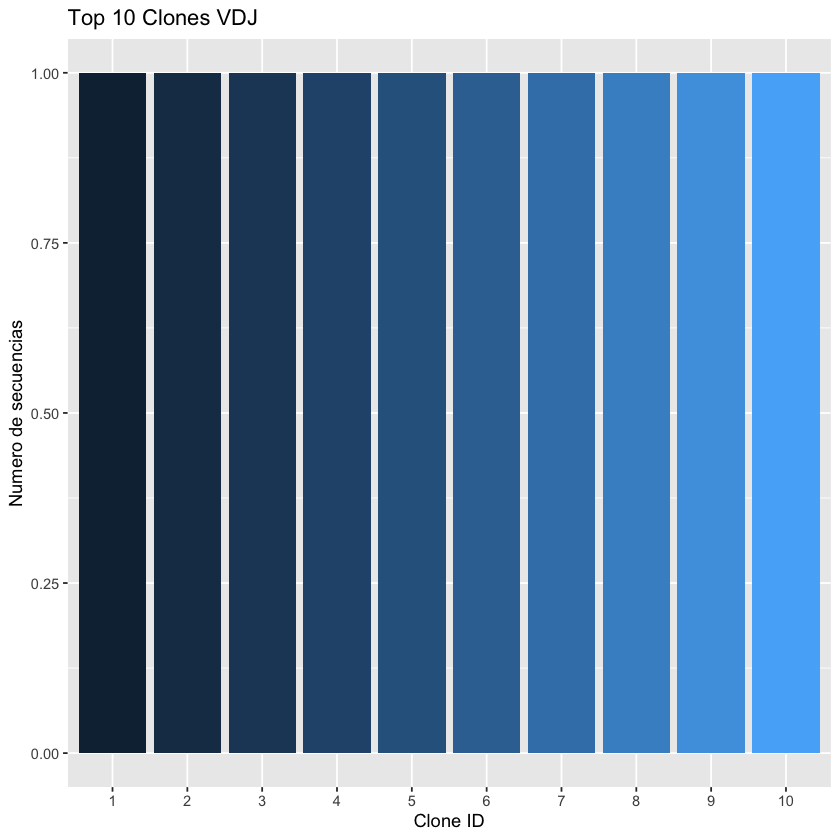

In [21]:
# Tamaño de cada clon

clon_size <- clones %>%
  group_by(clone_id) %>%
  summarise(n_seq = n(), .groups = "drop") %>%
  arrange(desc(n_seq)) %>%
  mutate(freq = n_seq / sum(n_seq))

# Top 10 clones

top10 <- clon_size %>%
  slice_max(order_by = n_seq, n = 10)

ggplot(top10, aes(x = reorder(clone_id, -n_seq), y = n_seq, fill = clone_id)) +
  geom_col() +
  labs(title = "Top 10 Clones VDJ", x = "Clone ID", y = "Numero de secuencias") +
  theme(legend.position = "none")


In [7]:
clones

sequence_id,sequence,rev_comp,productive,v_call,d_call,j_call,sequence_alignment,germline_alignment,junction,⋯,j_identity,j_support,fwr1,fwr2,fwr3,fwr4,cdr1,cdr2,cdr3,clone_id
<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
seq2,GAGGTGCAGCTGGTGGAGTCCGGGGGAGGCTTAGTTCAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTCAGTAGCTACTGGATGCACTGGGTCCGCCAAGCTCCAGGGAAGGGGCTGGTGTGGGTCTCACGTATTAATAGTGATGGGAGTAGCACAAGCTACGCGGACTCCGTGAAGGGCCGATTCACCATCTCCAGAGACAACGCCAAGAACACGCTGTATCTGCAAATGAACAGTCTGAGAGCCGAGGACACGGCTGTGTATTACTGTGCAAGAGACTCCGTTCAGCAGCTCGAGTACTTTGACTACTGGGGCCAAGGAACCCTGGTCACCGTCTCCTCA,FALSE,TRUE,IGHV3-74*01,IGHD6-6*01,IGHJ4*01,GAGGTGCAGCTGGTGGAGTCCGGGGGA...GGCTTAGTTCAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTC............AGTAGCTACTGGATGCACTGGGTCCGCCAAGCTCCAGGGAAGGGGCTGGTGTGGGTCTCACGTATTAATAGTGAT......GGGAGTAGCACAAGCTACGCGGACTCCGTGAAG...GGCCGATTCACCATCTCCAGAGACAACGCCAAGAACACGCTGTATCTGCAAATGAACAGTCTGAGAGCCGAGGACACGGCTGTGTATTACTGTGCAAGAGACTCCGTTCAGCAGCTCGAGTACTTTGACTACTGGGGCCAAGGAACCCTGGTCACCGTCTCCTCA,GAGGTGCAGCTGGTGGAGTCCGGGGGA...GGCTTAGTTCAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCACCTTC............AGTAGCTACTGGATGCACTGGGTCCGCCAAGCTCCAGGGAAGGGGCTGGTGTGGGTCTCACGTATTAATAGTGAT......GGGAGTAGCACAAGCTACGCGGACTCCGTGAAG...GGCCGATTCACCATCTCCAGAGACAACGCCAAGAACACGCTGTATCTGCAAATGAACAGTCTGAGAGCCGAGGACACGGCTGTGTATTACTGTGCAAGAGANNNNNNNNAGCAGCTCGNNTACTTTGACTACTGGGGCCAAGGAACCCTGGTCACCGTCTCCTCA,TGTGCAAGAGACTCCGTTCAGCAGCTCGAGTACTTTGACTACTGG,⋯,1,2.31e-21,GAGGTGCAGCTGGTGGAGTCCGGGGGA...GGCTTAGTTCAGCCTGGGGGGTCCCTGAGACTCTCCTGTGCAGCCTCT,ATGCACTGGGTCCGCCAAGCTCCAGGGAAGGGGCTGGTGTGGGTCTCACGT,AGCTACGCGGACTCCGTGAAG...GGCCGATTCACCATCTCCAGAGACAACGCCAAGAACACGCTGTATCTGCAAATGAACAGTCTGAGAGCCGAGGACACGGCTGTGTATTACTGT,TGGGGCCAAGGAACCCTGGTCACCGTCTCCTCA,GGATTCACCTTC............AGTAGCTACTGG,ATTAATAGTGAT......GGGAGTAGCACA,GCAAGAGACTCCGTTCAGCAGCTCGAGTACTTTGACTAC,1
seq5,GAGGTGCAGCTGGTGCAGTCTGGAGCAGAGGTGAAAAAGCCCGGGGAGTCTCTGAAGATCTCCTGTAAGGGTTCTGGATACAGCTTTACCAGCTACTGGATCGGCTGGGTGCGCCAGATGCCCGGGAAAGGCCTGGAGTGGATGGGGATCATCTATCCTGGTGACTCTGATACCAGATACAGCCCGTCCTTCCAAGGCCAGGTCACCATCTCAGCCGACAAGTCCATCAGCACCGCCTACCTGCAGTGGAGCAGCCTGAAGGCCTCGGACACCGCCATGTATTACTGTGCGAGACAGAGGGGCAGCTGCACTTACTACTTTGACTACTGGGGCCAAGGAACCCTGGTCACCGTCTCCTCA,FALSE,TRUE,IGHV5-51*01,"IGHD2-2*01,IGHD2-2*02,IGHD2-2*03",IGHJ4*01,GAGGTGCAGCTGGTGCAGTCTGGAGCA...GAGGTGAAAAAGCCCGGGGAGTCTCTGAAGATCTCCTGTAAGGGTTCTGGATACAGCTTT............ACCAGCTACTGGATCGGCTGGGTGCGCCAGATGCCCGGGAAAGGCCTGGAGTGGATGGGGATCATCTATCCTGGT......GACTCTGATACCAGATACAGCCCGTCCTTCCAA...GGCCAGGTCACCATCTCAGCCGACAAGTCCATCAGCACCGCCTACCTGCAGTGGAGCAGCCTGAAGGCCTCGGACACCGCCATGTATTACTGTGCGAGACAGAGGGGCAGCTGCACTTACTACTTTGACTACTGGGGCCAAGGAACCCTGGTCACCGTCTCCTCA,GAGGTGCAGCTGGTGCAGTCTGGAGCA...GAGGTGAAAAAGCCCGGGGAGTCTCTGAAGATCTCCTGTAAGGGTTCTGGATACAGCTTT............ACCAGCTACTGGATCGGCTGGGTGCGCCAGATGCCCGGGAAAGGCCTGGAGTGGATGGGGATCATCTATCCTGGT......GACTCTGATACCAGATACAGCCCGTCCTTCCAA...GGCCAGGTCACCATCTCAGCCGACAAGTCCATCAGCACCGCCTACCTGCAGTGGAGCAGCCTGAAGGCCTCGGACACCGCCATGTATTACTGTGCGAGACANNNNNNCAGCTGCNNNNACTACTTTGACTACTGGGGCCAAGGAACCCTGGTCACCGTCTCCTCA,TGTGCGAGACAGAGGGGCAGCTGCACTTACTACTTTGACTACTGG,⋯,1,1.61e-22,GAGGTGCAGCTGGTGCAGTCTGGAGCA...GAGGTGAAAAAGCCCGGGGAGTCTCTGAAGATCTCCTGTAAGGGTTCT,ATCGGCTGGGTGCGCCAGATGCCCGGGAAAGGCCTGGAGTGGATGGGGATC,AGATACAGCCCGTCCTTCCAA...GGCCAGGTCACCATCTCAGCCGACAAGTCCATCAGCACCGCCTACCTGCAGTGGAGCAGCCTGAAGGCCTCGGACACCGCCATGTATTACTGT,TGGGGCCAAGGAACCCTGGTCACCGTCTCCTCA,GGATACAGCTTT............ACCAGCTACTGG,ATCTATCCTGGT......GACTCTGATACC,GCGAGACAGAGGGGCAGCTGCACTTACTACTTTGACTAC,2
seq6,CAGGTGCAGCTACAGCAGTGGGGCGCAGGACTGTTGAAGCCTTCGGAGACCCTGTCCCTCACCTGCGCTGTCTATGGTGGGTCCTTCAGTGGTTACTACTGGAGCTGGATCCGCCAGCCCCCAGGGAAGGGGCTGGAGTGGATTGGGGAAATCAATCATAGTGGAAGCACCAACTACAACCCGTCCCTCAAGAGTCGAGTCACCATATCAGTAGACACGTCCAAGAACCAGTTCTCCCTGAAGCTGAGCTCTGTGACCGCCGCGGACACGGCTGTGTATTACTGTGCGAGAGGGAGGGGCAGTGGCTGGTACTACTTTGACTACTGGGGCCAAGGAACCCTGGTCACCGTCTCCTCA,FALSE,TRUE,IGHV4-34*01,IGHD6-19*01,IGHJ4*01,CAGGTGCAG

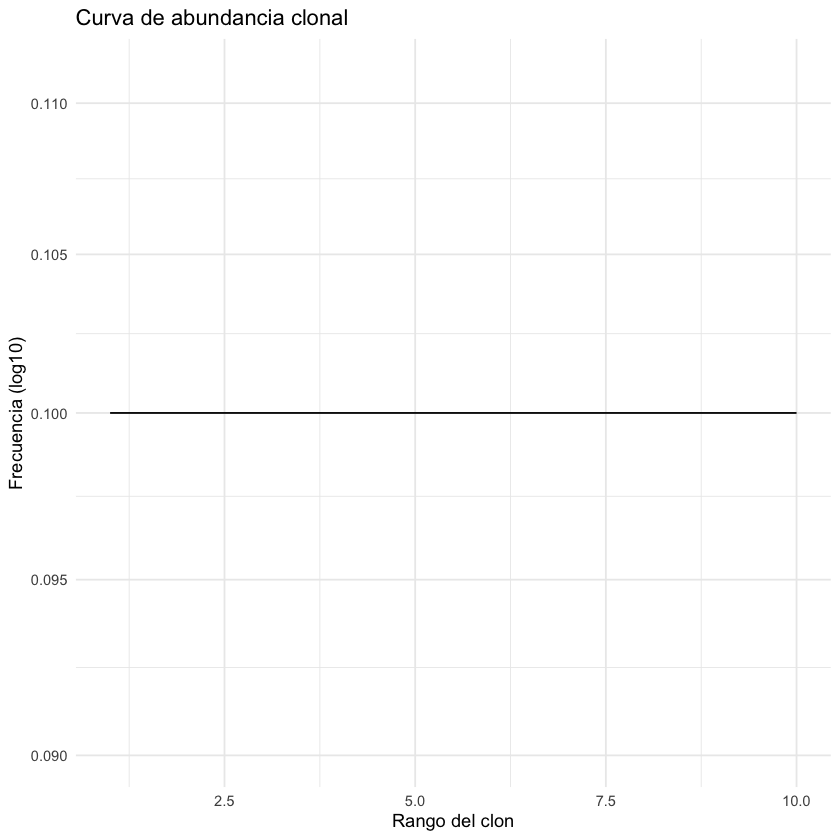

In [22]:
# Curva de abundancia clonal

clon_size %>%
  mutate(rank = row_number()) %>%
  ggplot(aes(x = rank, y = freq)) +
  geom_line() +
  scale_y_log10() +
  labs(title = "Curva de abundancia clonal", x = "Rango del clon", y = "Frecuencia (log10)") +
  theme_minimal()

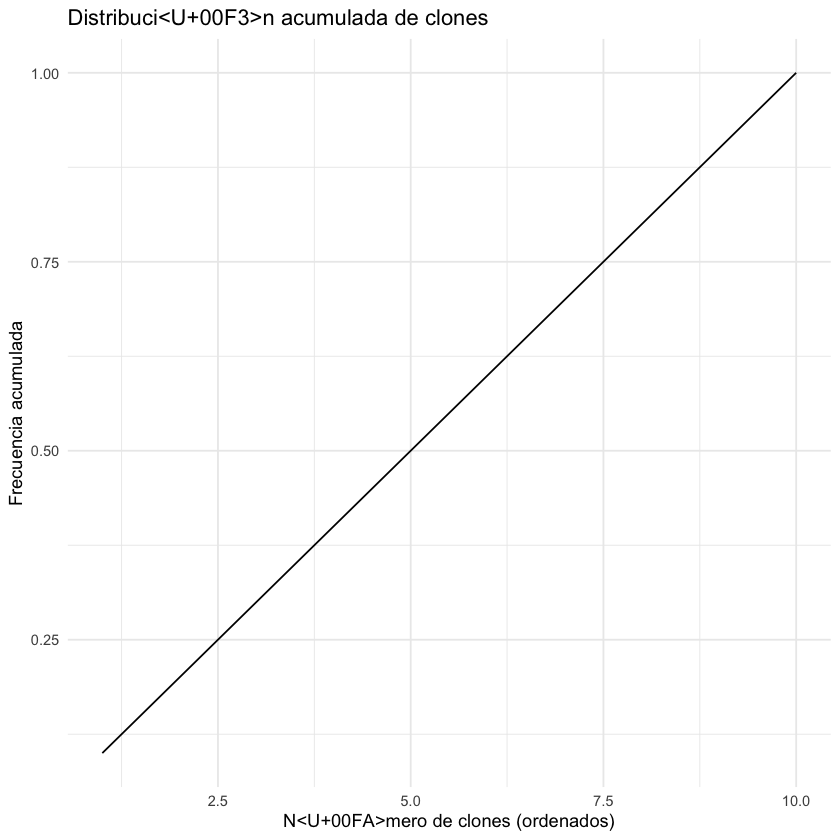

In [23]:
# Distribución acumulada

clon_size %>%
  mutate(cum_freq = cumsum(freq), rank = row_number()) %>%
  ggplot(aes(x = rank, y = cum_freq)) +
  geom_line() +
  labs(title = "Distribución acumulada de clones", x = "Número de clones (ordenados)", y = "Frecuencia acumulada") +
  theme_minimal()

In [ ]:
# Métricas de diversidad

In [ ]:
# Métricas de shm